In [85]:
#imports
import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import numpy as np
import pandas as pd

import seaborn as sns
plt.style.use('seaborn-whitegrid')

%matplotlib inline  

# ========================================================
# estilos de graficos :
# >>  https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
# ========================================================
# plt.style.use('seaborn-whitegrid')
# plt.style.use('seaborn-pastel')
# plt.style.use('seaborn-colorblind')
# plt.style.use('seaborn-bright')
# plt.style.use('grayscale')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('classic')
# plt.style.use('bmh')

In [118]:

prob = '0.01'
size = '10000'

df_bubble = None
df_merge = None
df_quick = None
df_insertion = None


arq_metadata = open('../data/data_grouped/_metadata.csv', 'w+')

filtro_arq = '%s_%s_' % (prob, size) 

pasta_origem = '../data/data_grouped'
arqs_in = os.listdir(pasta_origem)
for f in arqs_in:
    if (f.startswith(filtro_arq)):
        print(f)
        csv = os.path.join(pasta_origem, f)
        if ('bubble' in f):
            df_bubble = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)
        elif ('merge' in f):
            df_merge = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)
        elif ('quick' in f):
            df_quick = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)
        elif ('insertion' in f):
            df_insertion = pd.read_csv(delimiter = ';', filepath_or_buffer = csv)


0.01_10000_insertion.csv
0.01_10000_quick.csv
0.01_10000_merge.csv
0.01_10000_bubble.csv


In [119]:
# df_bubble.head()
# df_merge.head()
# df_quick.head()
# df_insertion.head()

print( df_bubble.shape[0], df_merge.shape[0], df_quick.shape[0], df_insertion.shape[0] )

1000 1000 1000 1000


In [120]:
df_bubble.describe()
df_bubble.head()

,algoritmo,probabilidade_erro,size_of_array,largest_sorted_subarray,k_unordered_sequence,percentual_k_unordered,percentual_maior_array
0,bubble,0.01,10000,427,352,3.52,4.27
1,bubble,0.01,10000,518,339,3.39,5.18
2,bubble,0.01,10000,708,335,3.35,7.08
3,bubble,0.01,10000,552,370,3.70,5.52
4,bubble,0.01,10000,503,374,3.74,5.03


In [121]:
data = df_bubble[['largest_sorted_subarray','k_unordered_sequence', 'percentual_k_unordered','percentual_maior_array']]
data_percentual = df_bubble[['percentual_k_unordered','percentual_maior_array']]
data_unordered = df_bubble[['percentual_k_unordered']]
data_maior_array = df_bubble[['percentual_maior_array']]

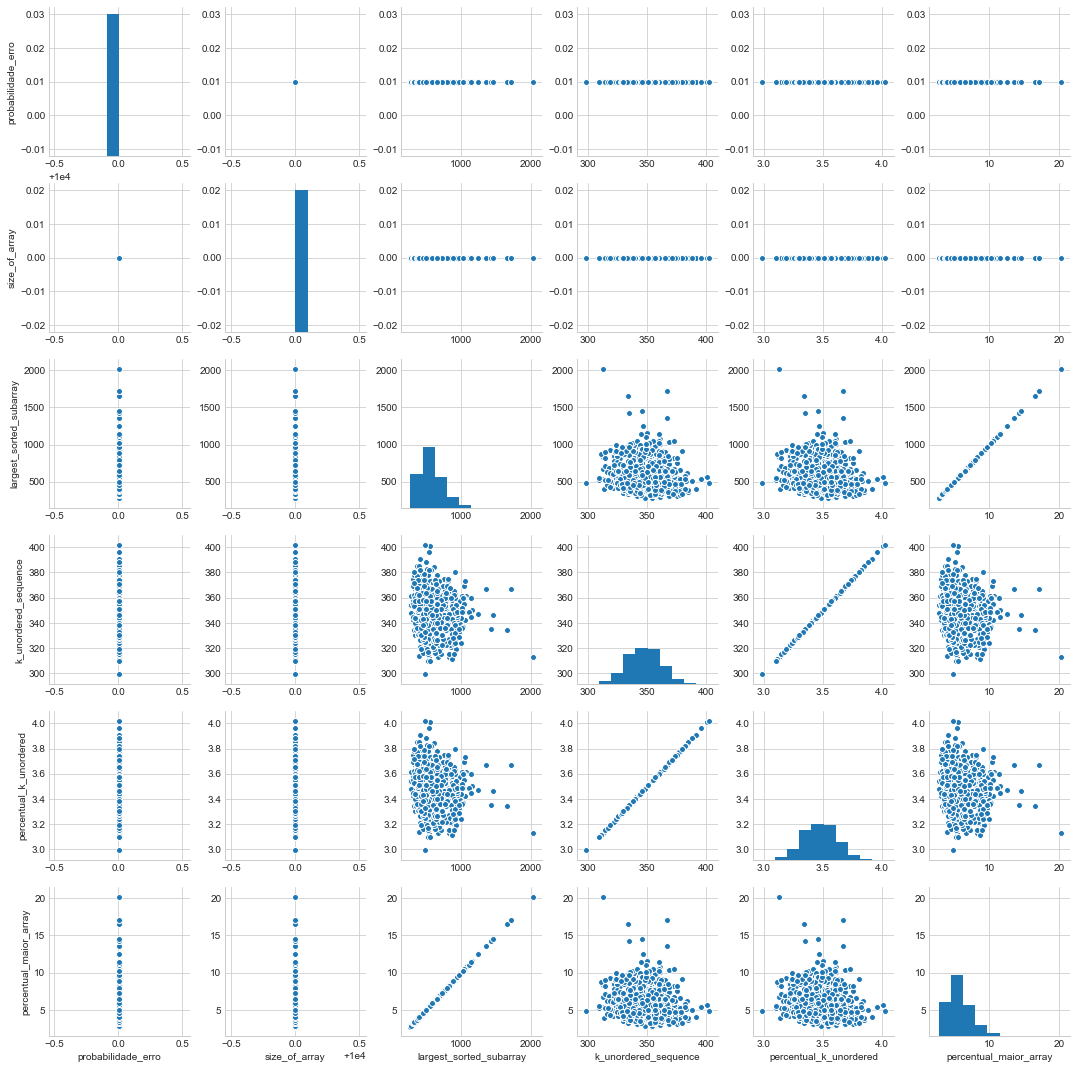

In [122]:
sns.pairplot(data=df_bubble)

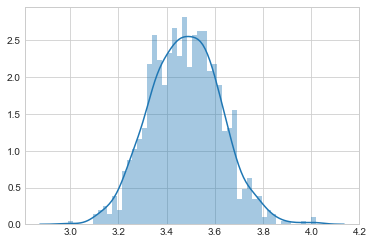

In [126]:
sns.distplot(data_unordered, bins=50)

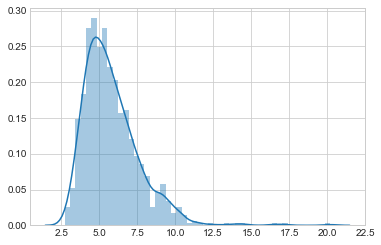

In [128]:
sns.distplot(data_maior_array, bins=50)

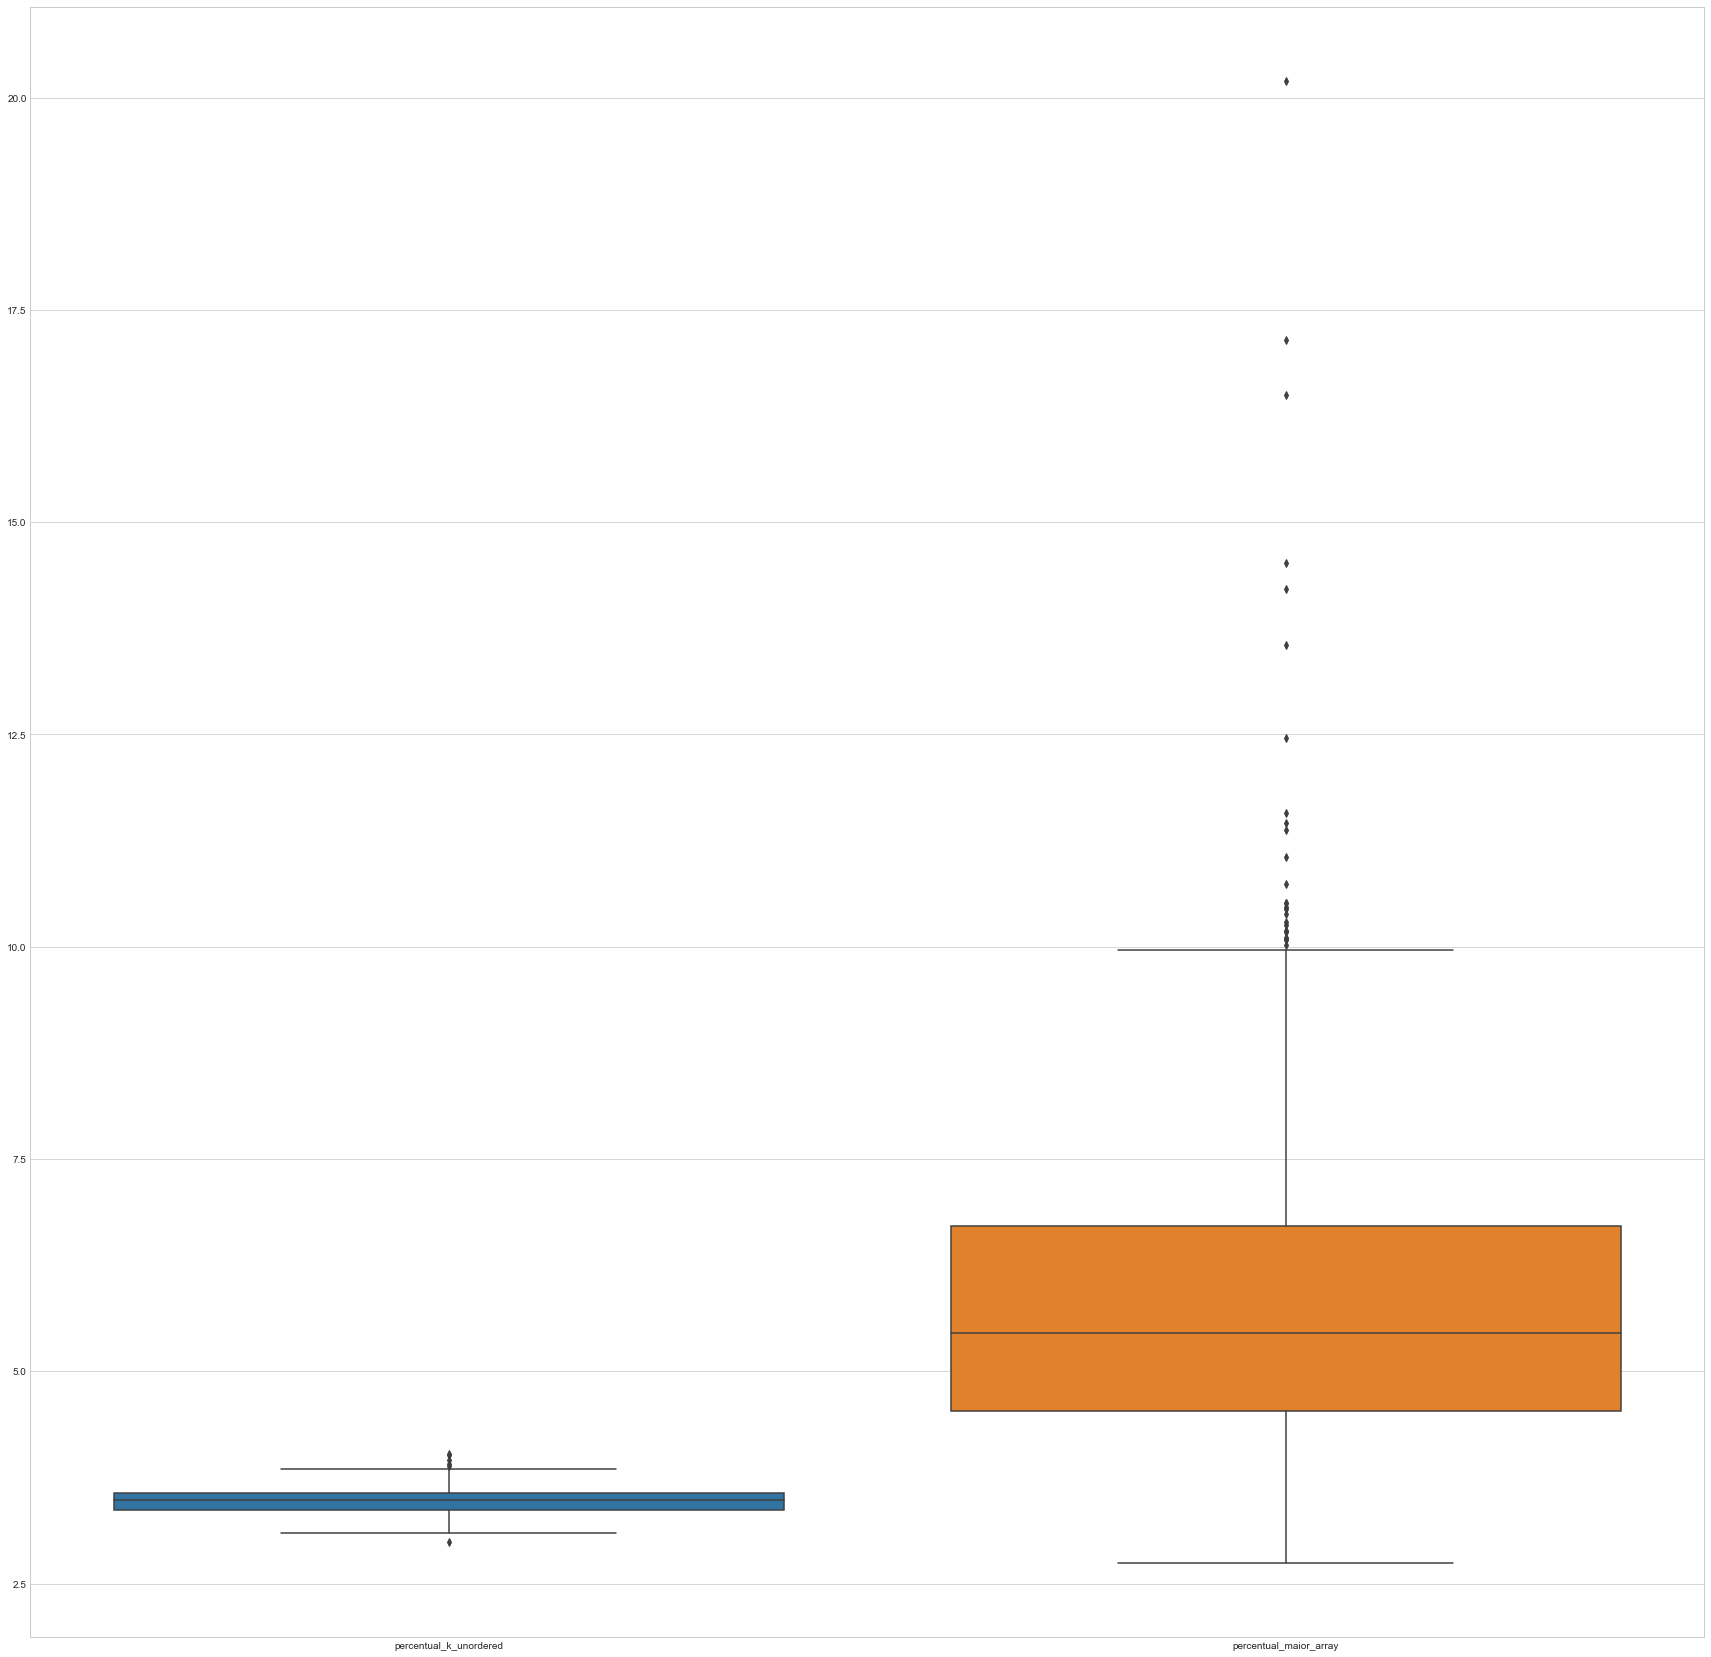

In [129]:
plt.figure(figsize=[30, 30])
sns.boxplot(data=data_percentual)

Text(0.5,1,'k-Unordered (Prob: 0.01, Tam: 10000)')

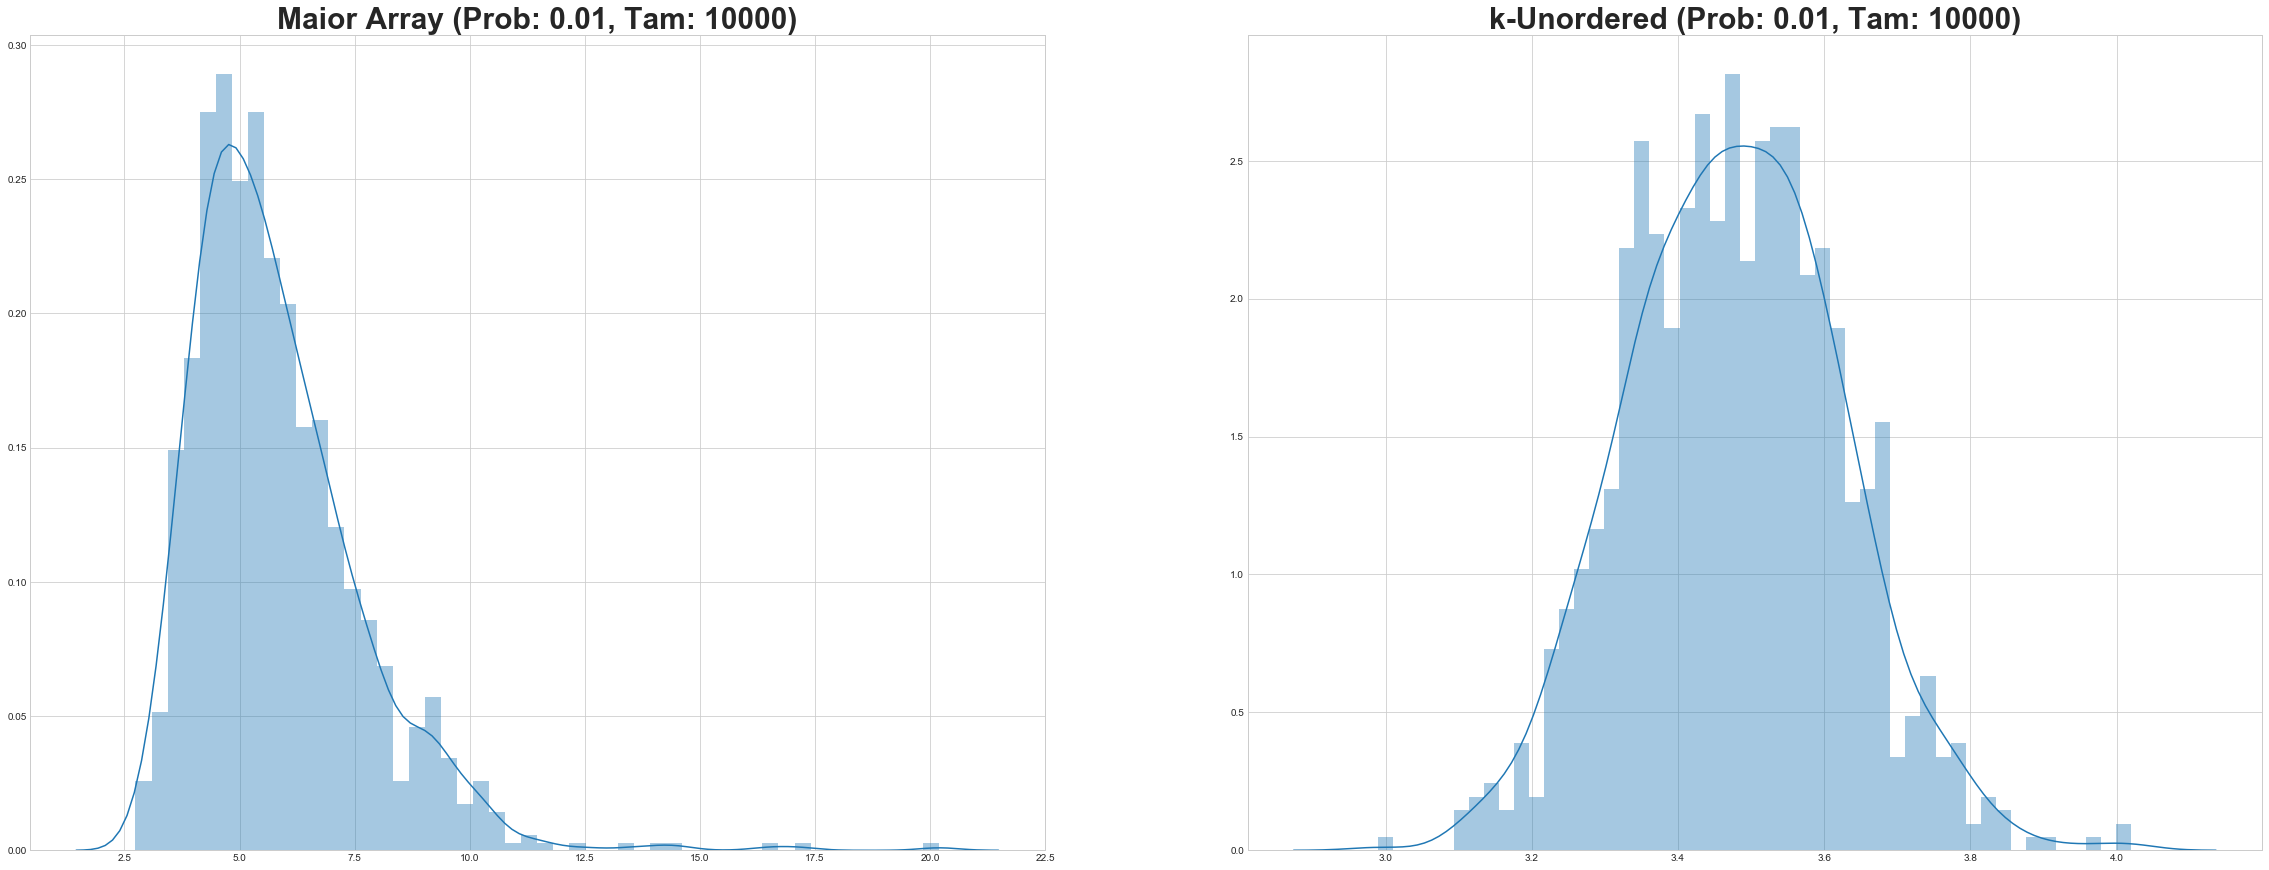

In [131]:
plt.figure(figsize=[40, 15])
font_prop = font_manager.FontProperties(size=30, style='normal', weight='bold')
nbins = 50
ax = plt.subplot(1,2,1)
sns.distplot(data_maior_array, bins=nbins)
plt.title('%s (Prob: %s, Tam: %s)' % ('Maior Array', prob, size), fontproperties=font_prop )

ax = plt.subplot(1,2,2)
sns.distplot(data_unordered, bins=nbins)
plt.title('%s (Prob: %s, Tam: %s)' % ('k-Unordered', prob, size), fontproperties=font_prop )
